# Reddit Post Processing and Graph Generation

## Posts Preprocessing and Preperation

### Importing Datasets

In [32]:
import zstandard as zstd
import pandas as pd
import numpy as np

# Without using raw strings, double backslashes
filepath = 'rawdata/PeakyBlinders_comments.zst'
decompressed_path = 'rawdata/PeakyBlinders_comments.json'

with open(filepath, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with open(decompressed_path, 'wb') as destination:
        dctx.copy_stream(compressed, destination)

df_comments = pd.read_json(decompressed_path, lines=True)
df_comments.head()

,score,link_id,gilded,downs,score_hidden,author_flair_text,parent_id,body,archived,distinguished,...,collapsed_because_crowd_control,author_premium,treatment_tags,top_awarded_type,comment_type,collapsed_reason_code,retrieved_utc,author_is_blocked,unrepliable_reason,editable
0,4,t3_1oj4z6,0,0.0,0.0,None,t3_1oj4z6,big fan of sons of anarchy so great to see tom...,1.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,t3_1onl1t,0,0.0,0.0,None,t3_1onl1t,**[SEASON FINALE]**\n\nThanks for joining us a...,1.0,moderator,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,t3_1onl1t,0,0.0,0.0,None,t3_1onl1t,Boom headshot!\n\nI was looking forward to an ...,1.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,t3_1onl1t,0,0.0,0.0,None,t1_cctu587,"Totally agree, I loved the originality,. You n...",1.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,t3_1onl1t,0,0.0,0.0,None,t1_cctu587,[First Headshot!](http://replygif.net/i/1072.g...,1.0,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
filepath = 'rawdata/PeakyBlinders_submissions.zst'
decompressed_path = 'rawdata/PeakyBlinders_submissions.json'

with open(filepath, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with open(decompressed_path, 'wb') as destination:
        dctx.copy_stream(compressed, destination)

df_submission = pd.read_json(decompressed_path, lines=True)
df_submission.head()

,thumbnail,edited,distinguished,report_reasons,downs,selftext_html,mod_reports,retrieved_on,domain,permalink,...,treatment_tags,poll_data,upvote_ratio,is_created_from_ads_ui,retrieved_utc,top_awarded_type,url_overridden_by_dest,gallery_data,is_gallery,call_to_action
0,http://c.thumbs.redditmedia.com/aaV_7APss2x5an...,0,None,NaN,0.0,None,[],1.411841e+09,bbc.co.uk,/r/PeakyBlinders/comments/1m3da0/peaky_blinder...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,self,0,None,NaN,0.0,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",[],1.411709e+09,self.PeakyBlinders,/r/PeakyBlinders/comments/1oj4z6/peaky_blinder...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://c.thumbs.redditmedia.com/luEVPyQtAseCJU...,0,None,NaN,0.0,None,[],1.411710e+09,denofgeek.com,/r/PeakyBlinders/comments/1oikim/season_2_conf...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://b.thumbs.redditmedia.com/q7VssUjYK0WA1r...,0,None,NaN,0.0,None,[],1.411708e+09,youtube.com,/r/PeakyBlinders/comments/1ojhl6/peaky_blinder...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://e.thumbs.redditmedia.com/kw1QN1ShOEuxyp...,0,None,NaN,0.0,None,[],1.411708e+09,youtube.com,/r/PeakyBlinders/comments/1ojhk5/peaky_blinder...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#dataset with all the submissions and their authors
subm_dataset = df_submission[['id','author','num_comments','created_utc','score','selftext']]
#rename to submission_id and submission_author
subm_dataset.columns = ['submission_id','submission_author','submission_num_comments','submission_created_utc','submission_score','submission_body']
subm_dataset = subm_dataset[subm_dataset['submission_author'] != '[deleted]']
subm_dataset = subm_dataset[subm_dataset['submission_body'] != '[removed]']
subm_dataset

,submission_id,submission_author,submission_num_comments,submission_created_utc,submission_score,submission_body
0,1m3da0,Toomz808,0,1378800005,13,
1,1oj4z6,xLite414,2,1381874432,11,**Season 1 Episode 5**: [Episode 5](http://i.i...
2,1oikim,xLite414,0,1381860253,9,
3,1ojhl6,xLite414,0,1381884517,6,
4,1ojhk5,xLite414,0,1381884499,7,
...,...,...,...,...,...,...
30529,zzsgpg,NoEchoPrime,7,1672487531,24,
30530,zzuw8m,ashrexia,0,1672495779,2,Does anyone know where the first scene in Seas...
30531,zzwvgl,fleurpoets,57,1672501603,69,edit! i want to stress that i don’t hate her o...
30532,zzxkhu,Beamedx,0,1672503539,17,


In [35]:
#dataset with all the comments with their authors and parent post/comment
coms_dataset = df_comments[['id','author','parent_id','score','body','created_utc']]
#rename to comment_id, comment_author
coms_dataset.columns = ['comment_id','Child ID','post_parent_id','score','body','created_utc']

##############################################################
coms_dataset.loc[:, 'Link Type'] = coms_dataset['post_parent_id'].apply(lambda x: 'respond to a comment' if x.startswith('t1') else 'respond to a submission')
coms_dataset.loc[:, 'post_parent_id'] = coms_dataset['post_parent_id'].apply(lambda x: x[3:])
coms_dataset


C:\Users\valhk\AppData\Local\Temp\ipykernel_30424\757254520.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coms_dataset.loc[:, 'Link Type'] = coms_dataset['post_parent_id'].apply(lambda x: 'respond to a comment' if x.startswith('t1') else 'respond to a submission')


,comment_id,Child ID,post_parent_id,score,body,created_utc,Link Type
0,cct0ivd,Fanshee,1oj4z6,4,big fan of sons of anarchy so great to see tom...,1381948558,respond to a submission
1,cctrr4z,xLite414,1onl1t,10,**[SEASON FINALE]**\n\nThanks for joining us a...,1382037389,respond to a submission
2,cctu587,BenjyXD,1onl1t,7,Boom headshot!\n\nI was looking forward to an ...,1382042950,respond to a submission
3,cctxz6m,Fanshee,cctu587,3,"Totally agree, I loved the originality,. You n...",1382052759,respond to a comment
4,ccu19vl,AIienreborn,cctu587,5,[First Headshot!](http://replygif.net/i/1072.g...,1382061203,respond to a comment
...,...,...,...,...,...,...,...
331944,j2fs06j,Bringit888,zzwvgl,4,Same ! I can't stand her.,1672528658,respond to a submission
331945,j2fsac2,Bringit888,j2fifzg,5,I've always seen 'I hate Grace' posts but not ...,1672528785,respond to a comment
331946,j2ftuvr,Jealous-Exchange7439,zyfrqa,2,How can I get some?,1672529497,respond to a submission
331947,j2fv9lz,Buckeyechamp21,zz9u0t,1,Finn,1672530134,respond to a submission


In [36]:
print(coms_dataset.columns)
print(subm_dataset.columns)

Index(['comment_id', 'Child ID', 'post_parent_id', 'score', 'body',
       'created_utc', 'Link Type'],
      dtype='object')
Index(['submission_id', 'submission_author', 'submission_num_comments',
       'submission_created_utc', 'submission_score', 'submission_body'],
      dtype='object')


### Preprocessing Datasets

In [37]:
##############################################################
#if the link_type is a response to a submission, then get submission_author from the submission dataset from row with post_parent_id == submission_id
#merge the coms dataset with the subm dataset on the post_parent_id and submission_id
coms_dataset = coms_dataset.merge(subm_dataset, left_on='post_parent_id', right_on='submission_id', how='left')
#rename the submission_author to Parent ID and remove the submission_id
coms_dataset = coms_dataset.drop(columns=['submission_id'])
coms_dataset = coms_dataset[['comment_id','Child ID','post_parent_id','score','body','created_utc','Link Type','submission_author']]
#rename submission id to 'Parent ID'
coms_dataset.rename(columns = {'submission_author':'Parent ID'}, inplace = True)
coms_dataset
coms_dataset

,comment_id,Child ID,post_parent_id,score,body,created_utc,Link Type,Parent ID
0,cct0ivd,Fanshee,1oj4z6,4,big fan of sons of anarchy so great to see tom...,1381948558,respond to a submission,xLite414
1,cctrr4z,xLite414,1onl1t,10,**[SEASON FINALE]**\n\nThanks for joining us a...,1382037389,respond to a submission,xLite414
2,cctu587,BenjyXD,1onl1t,7,Boom headshot!\n\nI was looking forward to an ...,1382042950,respond to a submission,xLite414
3,cctxz6m,Fanshee,cctu587,3,"Totally agree, I loved the originality,. You n...",1382052759,respond to a comment,NaN
4,ccu19vl,AIienreborn,cctu587,5,[First Headshot!](http://replygif.net/i/1072.g...,1382061203,respond to a comment,NaN
...,...,...,...,...,...,...,...,...
331944,j2fs06j,Bringit888,zzwvgl,4,Same ! I can't stand her.,1672528658,respond to a submission,fleurpoets
331945,j2fsac2,Bringit888,j2fifzg,5,I've always seen 'I hate Grace' posts but not ...,1672528785,respond to a comment,NaN
331946,j2ftuvr,Jealous-Exchange7439,zyfrqa,2,How can I get some?,1672529497,respond to a submission,-36chambers-
331947,j2fv9lz,Buckeyechamp21,zz9u0t,1,Finn,1672530134,respond to a submission,parcequepourquoipas


In [38]:

##############################################################
#if the link_type is a response to a comment, then get the author from the comment dataset from row with post_parent_id == comment_id
#merge the coms dataset with itself on the post_parent_id and comment_id
coms_dataset = coms_dataset.merge(coms_dataset[['comment_id','Child ID']], left_on='post_parent_id', right_on='comment_id', how='left')
coms_dataset['Parent ID'] = coms_dataset['Parent ID'].fillna(coms_dataset['Child ID_y'])
coms_dataset = coms_dataset.drop(columns=['Child ID_y','comment_id_y'])
coms_dataset.columns = ['comment_id','Child ID','post_parent_id','score','body','created_utc','Link Type','Parent ID']
coms_dataset

,comment_id,Child ID,post_parent_id,score,body,created_utc,Link Type,Parent ID
0,cct0ivd,Fanshee,1oj4z6,4,big fan of sons of anarchy so great to see tom...,1381948558,respond to a submission,xLite414
1,cctrr4z,xLite414,1onl1t,10,**[SEASON FINALE]**\n\nThanks for joining us a...,1382037389,respond to a submission,xLite414
2,cctu587,BenjyXD,1onl1t,7,Boom headshot!\n\nI was looking forward to an ...,1382042950,respond to a submission,xLite414
3,cctxz6m,Fanshee,cctu587,3,"Totally agree, I loved the originality,. You n...",1382052759,respond to a comment,BenjyXD
4,ccu19vl,AIienreborn,cctu587,5,[First Headshot!](http://replygif.net/i/1072.g...,1382061203,respond to a comment,BenjyXD
...,...,...,...,...,...,...,...,...
331966,j2fs06j,Bringit888,zzwvgl,4,Same ! I can't stand her.,1672528658,respond to a submission,fleurpoets
331967,j2fsac2,Bringit888,j2fifzg,5,I've always seen 'I hate Grace' posts but not ...,1672528785,respond to a comment,logaboga
331968,j2ftuvr,Jealous-Exchange7439,zyfrqa,2,How can I get some?,1672529497,respond to a submission,-36chambers-
331969,j2fv9lz,Buckeyechamp21,zz9u0t,1,Finn,1672530134,respond to a submission,parcequepourquoipas


In [39]:

##############################################################
#drop null values 
coms_dataset.dropna(inplace=True)
# remove comments made by deleted users
coms_dataset = coms_dataset[coms_dataset['Parent ID'] != '[deleted]']
coms_dataset = coms_dataset[coms_dataset['Child ID'] != '[deleted]']
# rearrange columns
coms_dataset = coms_dataset[['Child ID','Parent ID','Link Type','comment_id','post_parent_id','score','body','created_utc']]

#find number of comments
all_comments = coms_dataset['comment_id'].unique()
coms = coms_dataset[(coms_dataset['Link Type'] == 'respond to a comment') & (coms_dataset['post_parent_id'].isin(all_comments))]
comments_count = coms.groupby('post_parent_id')['post_parent_id'].count()
coms_dataset['No_Comments'] = coms_dataset['post_parent_id'].map(comments_count).fillna(0)
coms_dataset
coms_dataset

,Child ID,Parent ID,Link Type,comment_id,post_parent_id,score,body,created_utc,No_Comments
0,Fanshee,xLite414,respond to a submission,cct0ivd,1oj4z6,4,big fan of sons of anarchy so great to see tom...,1381948558,0.0
1,xLite414,xLite414,respond to a submission,cctrr4z,1onl1t,10,**[SEASON FINALE]**\n\nThanks for joining us a...,1382037389,0.0
2,BenjyXD,xLite414,respond to a submission,cctu587,1onl1t,7,Boom headshot!\n\nI was looking forward to an ...,1382042950,0.0
3,Fanshee,BenjyXD,respond to a comment,cctxz6m,cctu587,3,"Totally agree, I loved the originality,. You n...",1382052759,2.0
4,AIienreborn,BenjyXD,respond to a comment,ccu19vl,cctu587,5,[First Headshot!](http://replygif.net/i/1072.g...,1382061203,2.0
...,...,...,...,...,...,...,...,...,...
331966,Bringit888,fleurpoets,respond to a submission,j2fs06j,zzwvgl,4,Same ! I can't stand her.,1672528658,0.0
331967,Bringit888,logaboga,respond to a comment,j2fsac2,j2fifzg,5,I've always seen 'I hate Grace' posts but not ...,1672528785,2.0
331968,Jealous-Exchange7439,-36chambers-,respond to a submission,j2ftuvr,zyfrqa,2,How can I get some?,1672529497,0.0
331969,Buckeyechamp21,parcequepourquoipas,respond to a submission,j2fv9lz,zz9u0t,1,Finn,1672530134,0.0


In [40]:
# remove rows where Child ID is the same as Parent ID
coms_dataset = coms_dataset[coms_dataset['Child ID'] != coms_dataset['Parent ID']]
# remove rows where Child ID or Parent ID is the same as 'AutoModerator'
coms_dataset = coms_dataset[coms_dataset['Child ID'] != 'AutoModerator']
coms_dataset = coms_dataset[coms_dataset['Parent ID'] != 'AutoModerator']
# Convert the 'created_utc' column to datetime for easier handling
coms_dataset['created_utc'] = pd.to_datetime(coms_dataset['created_utc'], unit='s')
coms_dataset

coms_dataset

,Child ID,Parent ID,Link Type,comment_id,post_parent_id,score,body,created_utc,No_Comments
0,Fanshee,xLite414,respond to a submission,cct0ivd,1oj4z6,4,big fan of sons of anarchy so great to see tom...,2013-10-16 18:35:58,0.0
2,BenjyXD,xLite414,respond to a submission,cctu587,1onl1t,7,Boom headshot!\n\nI was looking forward to an ...,2013-10-17 20:49:10,0.0
3,Fanshee,BenjyXD,respond to a comment,cctxz6m,cctu587,3,"Totally agree, I loved the originality,. You n...",2013-10-17 23:32:39,2.0
4,AIienreborn,BenjyXD,respond to a comment,ccu19vl,cctu587,5,[First Headshot!](http://replygif.net/i/1072.g...,2013-10-18 01:53:23,2.0
5,fiercelyfriendly,xLite414,respond to a submission,ccu5pfw,1onl1t,4,"Did Campbell shoot Grace, himself, or just fir...",2013-10-18 05:34:22,0.0
...,...,...,...,...,...,...,...,...,...
331966,Bringit888,fleurpoets,respond to a submission,j2fs06j,zzwvgl,4,Same ! I can't stand her.,2022-12-31 23:17:38,0.0
331967,Bringit888,logaboga,respond to a comment,j2fsac2,j2fifzg,5,I've always seen 'I hate Grace' posts but not ...,2022-12-31 23:19:45,2.0
331968,Jealous-Exchange7439,-36chambers-,respond to a submission,j2ftuvr,zyfrqa,2,How can I get some?,2022-12-31 23:31:37,0.0
331969,Buckeyechamp21,parcequepourquoipas,respond to a submission,j2fv9lz,zz9u0t,1,Finn,2022-12-31 23:42:14,0.0


### Creating the 3 time frames

In [41]:
#define the pre-release period
start = pd.to_datetime('2019-07-10') #8 days before first episode teaser release
end = pd.to_datetime('2019-08-24')  #day before first episode airing
pre_release = coms_dataset[((coms_dataset['created_utc'] >= start) & (coms_dataset['created_utc'] <= end))].copy()

#get a list of all unique ids in child id and parent id
all_ids = np.unique(np.array(pre_release['Child ID'], pre_release['Parent ID'])).tolist()
print("Number of users in the preperiod is", len(all_ids))

Number of users in the preperiod is 1490


In [42]:
#define airing period
start = pd.to_datetime('2019-08-25') #first episode airing
end = pd.to_datetime('2019-09-30') #one week after last episode airing
airing = coms_dataset[((coms_dataset['created_utc'] >= start) & (coms_dataset['created_utc'] <= end))].copy()
#filter to only keep the unique ids in the pre-release period
airing = airing[(airing['Child ID'].isin(all_ids)) & (airing['Parent ID'].isin(all_ids))]
print("Number of users in the airing period is", len(np.unique(np.array(airing['Child ID'], airing['Parent ID']))))
airing

Number of users in the airing period is 290


,Child ID,Parent ID,Link Type,comment_id,post_parent_id,score,body,created_utc,No_Comments
54453,The72nd,BogerFrank981,respond to a comment,ey1qs6j,exysdqg,16,u *WOP MATE \n\nFTFY,2019-08-25 04:37:04,1.0
54454,deepcontractor,thehornedlamb,respond to a submission,ey1rif2,cv1s2j,3,https://www.reddit.com/r/PeakyBlinders/comment...,2019-08-25 04:49:00,0.0
54457,purpletube5678,culed10s,respond to a submission,ey1ungk,cus9ns,3,Awesome Alfie. \n\nBut I feel the need to coun...,2019-08-25 05:45:44,0.0
54459,Ser_Pr1ze,ElderHallow,respond to a comment,ey1x21c,ey0xp3g,6,I think it’s because the writers wanted to foc...,2019-08-25 06:33:00,1.0
54462,0ddbuttons,AlbionsSeed,respond to a comment,ey1y3o0,ey1p763,1,This is tremendously funny b/c I'm a very happ...,2019-08-25 06:53:06,0.0
...,...,...,...,...,...,...,...,...,...
71934,BadManPro,kpps14red,respond to a comment,f1r3i9u,f1r3e3g,6,Thanks ill message him soon.,2019-09-28 22:44:35,1.0
71963,Unlucky13,fiveMop,respond to a submission,f1sko1i,da6mlu,5,I think the show inflates the amounts because ...,2019-09-29 04:10:13,0.0
71968,fiveMop,Unlucky13,respond to a comment,f1tkndx,f1sko1i,4,I haven't watched Boardwalk Empire but what yo...,2019-09-29 08:29:41,1.0
72029,KobayashiDragonSlave,MoodGratitude,respond to a comment,f1vlnt6,f1nfaox,2,You seem to be knowledgeable about haircuts. W...,2019-09-29 15:57:02,1.0


In [43]:
#define post air period
start = pd.to_datetime('2019-10-01') #one week after last episode airing
end = pd.to_datetime('2019-11-30') #two months after last episode airing
post_air = coms_dataset[((coms_dataset['created_utc'] >= start) & (coms_dataset['created_utc'] <= end))].copy()
#filter to only keep the unique ids in the pre-release period
post_air = post_air[(post_air['Child ID'].isin(all_ids)) & (post_air['Parent ID'].isin(all_ids))]
print("Number of users in the post airing period is", len(np.unique(np.array(post_air['Child ID'], post_air['Parent ID']))))
post_air

Number of users in the post airing period is 123


,Child ID,Parent ID,Link Type,comment_id,post_parent_id,score,body,created_utc,No_Comments
72234,Omar_Elattar,LilSenate,respond to a comment,f22hq5g,f22h8ym,35,It’s the real Oswald Mosley.,2019-10-01 00:21:19,1.0
72235,LilSenate,Omar_Elattar,respond to a comment,f22hugz,f22hq5g,37,Damn. They did a good job with his character i...,2019-10-01 00:22:28,1.0
72298,0ddbuttons,AlbionsSeed,respond to a submission,f23d59a,dbntvc,8,Tommy makes promises based on what he thinks h...,2019-10-01 08:15:57,0.0
72310,ZugTurmfalke,0ddbuttons,respond to a comment,f23fvhj,f237su9,2,Do you know what they are smoking in the serie...,2019-10-01 09:34:30,0.0
72341,AlbionsSeed,0ddbuttons,respond to a comment,f23pxbx,f23d59a,3,What about the late arrival of the “lost lamb”...,2019-10-01 12:52:43,1.0
...,...,...,...,...,...,...,...,...,...
87124,AlbionsSeed,Catts3,respond to a comment,f8oufl9,f8ogvfo,2,So?\n\nAre you saying his charitable contribut...,2019-11-25 13:59:53,1.0
87127,Catts3,AlbionsSeed,respond to a comment,f8ouzwm,f8oufl9,1,Of course not. I was joking just like that pic...,2019-11-25 14:05:01,1.0
87131,AlbionsSeed,Catts3,respond to a comment,f8oxti5,f8ouzwm,1,“I was just joking.”,2019-11-25 14:30:13,1.0
87608,torgrimbonemaster,Oliver_Anchovies,respond to a submission,f8wvug3,e2pkej,8,Arthur was attacked by an unknown assailant th...,2019-11-28 00:35:08,0.0


## Creating the Networks

In [44]:
import networkx as nx

G1 = nx.DiGraph()
G1.add_nodes_from(all_ids)

df1 = pre_release.copy()
# Add edges to the graph (Parent ID -> Child ID)
for index, row in df1.iterrows():
    if row['Parent ID'] != row['Child ID']:
        G1.add_edge(row["Child ID"], row["Parent ID"])

nodes1 = G1.nodes()

metrics_df1 = pd.DataFrame(index=nodes1)

metrics_df1.reset_index(inplace=True)
metrics_df1.rename(columns={'index': 'Node'}, inplace=True)

# #get the betweeness of each node
betweenness_dict = nx.betweenness_centrality(G1)
metrics_df1['Betweenness'] = metrics_df1['Node'].map(betweenness_dict)

# #get the closeness of each node
closeness_dict = nx.closeness_centrality(G1)
metrics_df1['Closeness'] = metrics_df1['Node'].map(closeness_dict)

# #get the degree centrality of each node
degree_centrality_dict = nx.degree_centrality(G1)
metrics_df1['Degree Centrality'] = metrics_df1['Node'].map(degree_centrality_dict)

#get the degree of each node
degrees = dict(G1.degree())
for index,row in metrics_df1.iterrows():
    metrics_df1.at[index,'Degree'] = degrees[row['Node']]
metrics_df1

metrics_df1.head()

,Node,Betweenness,Closeness,Degree Centrality,Degree
0,-CHAOSKEKS-,0.000000,0.000000,0.000619,1.0
1,-Gaius_Julius_Caesar,0.000652,0.169264,0.003094,5.0
2,0ddbuttons,0.009574,0.235674,0.024752,40.0
3,0ffice_Zombie,0.000000,0.000000,0.000619,1.0
4,1010_darkhorse,0.000000,0.000619,0.001238,2.0


In [45]:
#find number of submissions made by each user
submissions_count = df1[df1['Link Type'] == 'respond to a submission'].groupby('Parent ID')['post_parent_id'].nunique()
metrics_df1['#Submissions'] = metrics_df1['Node'].map(submissions_count).fillna(0)

#find number of comments made by each user
comments_count = df1['Child ID'].value_counts() 
metrics_df1['#Comments'] = metrics_df1['Node'].map(comments_count).fillna(0)

#find number of comments made on user's submissions
comments_on_submissions_count = df1[df1['Link Type'] == 'respond to a submission']['Parent ID'].value_counts()
metrics_df1['#Comments on Submissions'] = metrics_df1['Node'].map(comments_on_submissions_count).fillna(0)

#find number of comments made on user's comments
comments_on_comments_count = df1[df1['Link Type'] == 'respond to a comment']['Parent ID'].value_counts()
metrics_df1['#Comments on Comments'] = metrics_df1['Node'].map(comments_on_comments_count).fillna(0)


display(metrics_df1)

,Node,Betweenness,Closeness,Degree Centrality,Degree,#Submissions,#Comments,#Comments on Submissions,#Comments on Comments
0,-CHAOSKEKS-,0.000000,0.000000,0.000619,1.0,0.0,1.0,0.0,0.0
1,-Gaius_Julius_Caesar,0.000652,0.169264,0.003094,5.0,1.0,1.0,4.0,1.0
2,0ddbuttons,0.009574,0.235674,0.024752,40.0,0.0,35.0,0.0,15.0
3,0ffice_Zombie,0.000000,0.000000,0.000619,1.0,0.0,1.0,0.0,0.0
4,1010_darkhorse,0.000000,0.000619,0.001238,2.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1612,jeorjhejerome,0.000000,0.195907,0.001856,3.0,1.0,0.0,3.0,0.0
1613,Mantissa_65,0.000000,0.000619,0.000619,1.0,1.0,0.0,1.0,0.0
1614,SkoCubs01,0.000000,0.000619,0.000619,1.0,1.0,0.0,1.0,0.0
1615,eunan08,0.000000,0.197548,0.005569,9.0,1.0,0.0,9.0,0.0


In [46]:
metrics_df1.isna().sum()

Node                        0
Betweenness                 0
Closeness                   0
Degree Centrality           0
Degree                      0
#Submissions                0
#Comments                   0
#Comments on Submissions    0
#Comments on Comments       0
dtype: int64

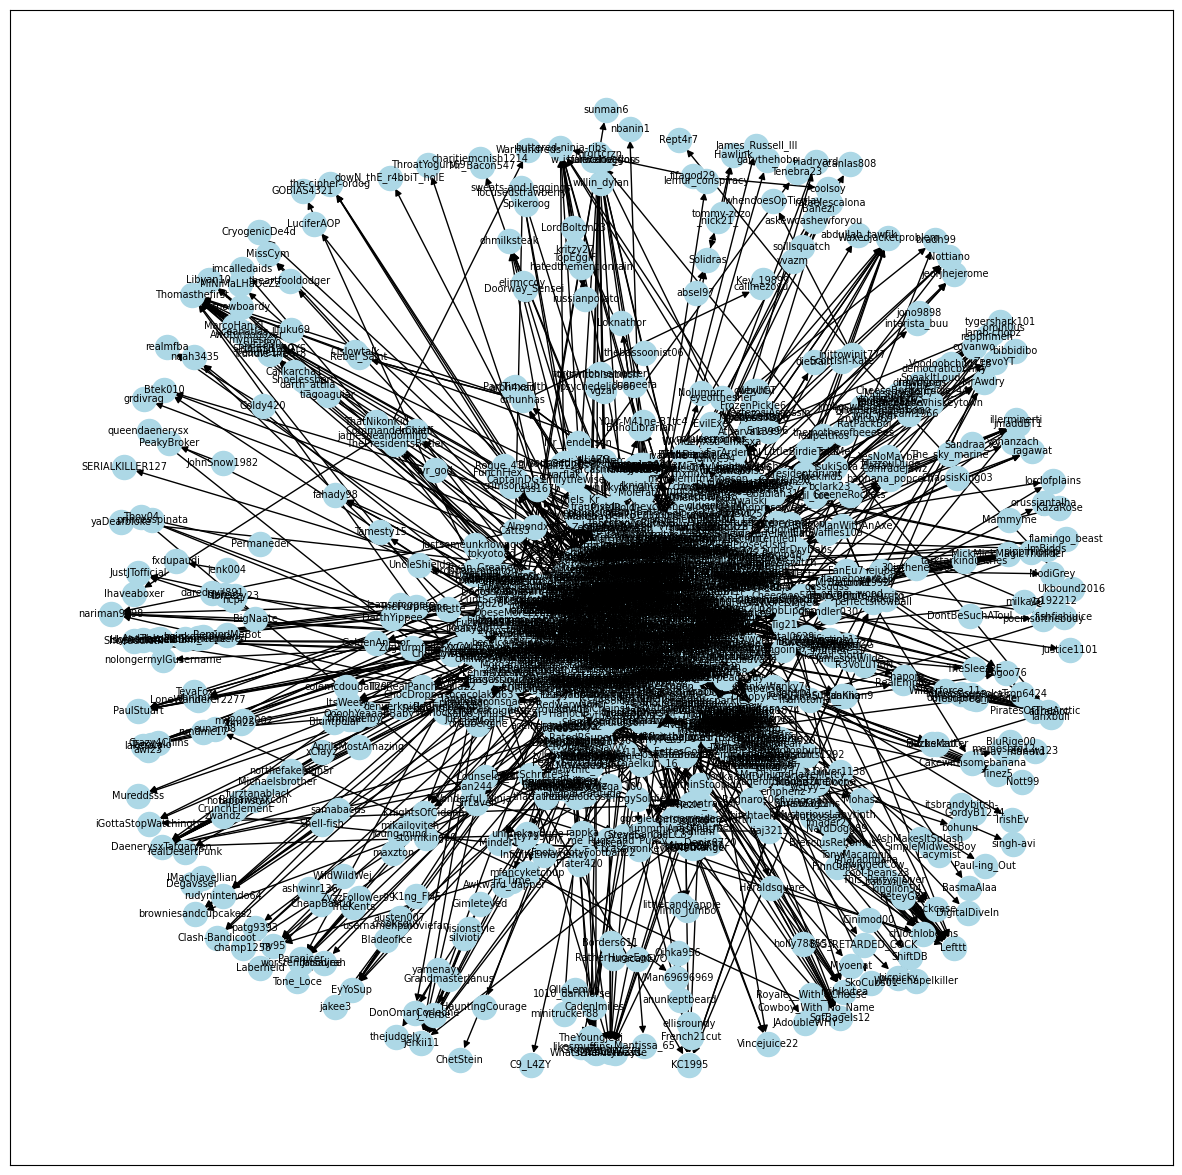

In [47]:
import matplotlib.pyplot as plt

layout = nx.spring_layout(G1)

# Draw the subgraph with labels
plt.figure(figsize=(15, 15))  # Adjust figure size as needed
nx.draw_networkx(G1, pos=layout, with_labels=True, node_color='lightblue', node_size=300, font_size=7, arrows=True)

# Show the plot
plt.show()

In [48]:
#create network for airing period
G2 = nx.DiGraph()
df2 = airing.copy()
# Add edges to the graph (Parent ID -> Child ID)
for index, row in df2.iterrows():
    if row['Parent ID'] != row['Child ID']:
        G2.add_edge(row["Child ID"], row["Parent ID"])

nodes2 = G2.nodes()
metrics_df2 = pd.DataFrame(index=nodes2)
metrics_df2.reset_index(inplace=True)
metrics_df2.rename(columns={'index': 'Node'}, inplace=True)

# #get the betweeness of each node
betweenness_dict = nx.betweenness_centrality(G2)
metrics_df2['Betweenness'] = metrics_df2['Node'].map(betweenness_dict)

# #get the closeness of each node
closeness_dict = nx.closeness_centrality(G2)
metrics_df2['Closeness'] = metrics_df2['Node'].map(closeness_dict)

# #get the degree centrality of each node
degree_centrality_dict = nx.degree_centrality(G2)
metrics_df2['Degree Centrality'] = metrics_df2['Node'].map(degree_centrality_dict)

#get the degree of each node
degrees = dict(G2.degree())
for index,row in metrics_df2.iterrows():
    metrics_df2.at[index,'Degree'] = degrees[row['Node']]

metrics_df2.head()

,Node,Betweenness,Closeness,Degree Centrality,Degree
0,The72nd,0.000000,0.000000,0.002941,1.0
1,BogerFrank981,0.002004,0.002941,0.005882,2.0
2,deepcontractor,0.046501,0.272048,0.111765,38.0
3,thehornedlamb,0.002907,0.200262,0.011765,4.0
4,purpletube5678,0.000000,0.000000,0.002941,1.0


In [49]:
#find number of submissions made by each user
submissions_count = df2[df2['Link Type'] == 'respond to a submission'].groupby('Parent ID')['post_parent_id'].nunique()
metrics_df2['#Submissions'] = metrics_df2['Node'].map(submissions_count).fillna(0)

#find number of comments made by each user
comments_count = df2['Child ID'].value_counts() 
metrics_df2['#Comments'] = metrics_df2['Node'].map(comments_count).fillna(0)

#find number of comments made on user's submissions
comments_on_submissions_count = df2[df2['Link Type'] == 'respond to a submission']['Parent ID'].value_counts()
metrics_df2['#Comments on Submissions'] = metrics_df2['Node'].map(comments_on_submissions_count).fillna(0)

#find number of comments made on user's comments
comments_on_comments_count = df2[df2['Link Type'] == 'respond to a comment']['Parent ID'].value_counts()
metrics_df2['#Comments on Comments'] = metrics_df2['Node'].map(comments_on_comments_count).fillna(0)


display(metrics_df2)

,Node,Betweenness,Closeness,Degree Centrality,Degree,#Submissions,#Comments,#Comments on Submissions,#Comments on Comments
0,The72nd,0.000000,0.000000,0.002941,1.0,0.0,1.0,0.0,0.0
1,BogerFrank981,0.002004,0.002941,0.005882,2.0,0.0,2.0,0.0,1.0
2,deepcontractor,0.046501,0.272048,0.111765,38.0,6.0,17.0,23.0,9.0
3,thehornedlamb,0.002907,0.200262,0.011765,4.0,1.0,2.0,2.0,1.0
4,purpletube5678,0.000000,0.000000,0.002941,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
336,FogellMcLovin77,0.000000,0.000000,0.002941,1.0,0.0,1.0,0.0,0.0
337,GrandmasterJanus,0.000000,0.000000,0.002941,1.0,0.0,1.0,0.0,0.0
338,jimboswaggerman,0.000000,0.204621,0.002941,1.0,0.0,0.0,0.0,1.0
339,kpps14red,0.000000,0.138487,0.005882,2.0,0.0,1.0,0.0,1.0


In [50]:
metrics_df2.isna().sum()

Node                        0
Betweenness                 0
Closeness                   0
Degree Centrality           0
Degree                      0
#Submissions                0
#Comments                   0
#Comments on Submissions    0
#Comments on Comments       0
dtype: int64

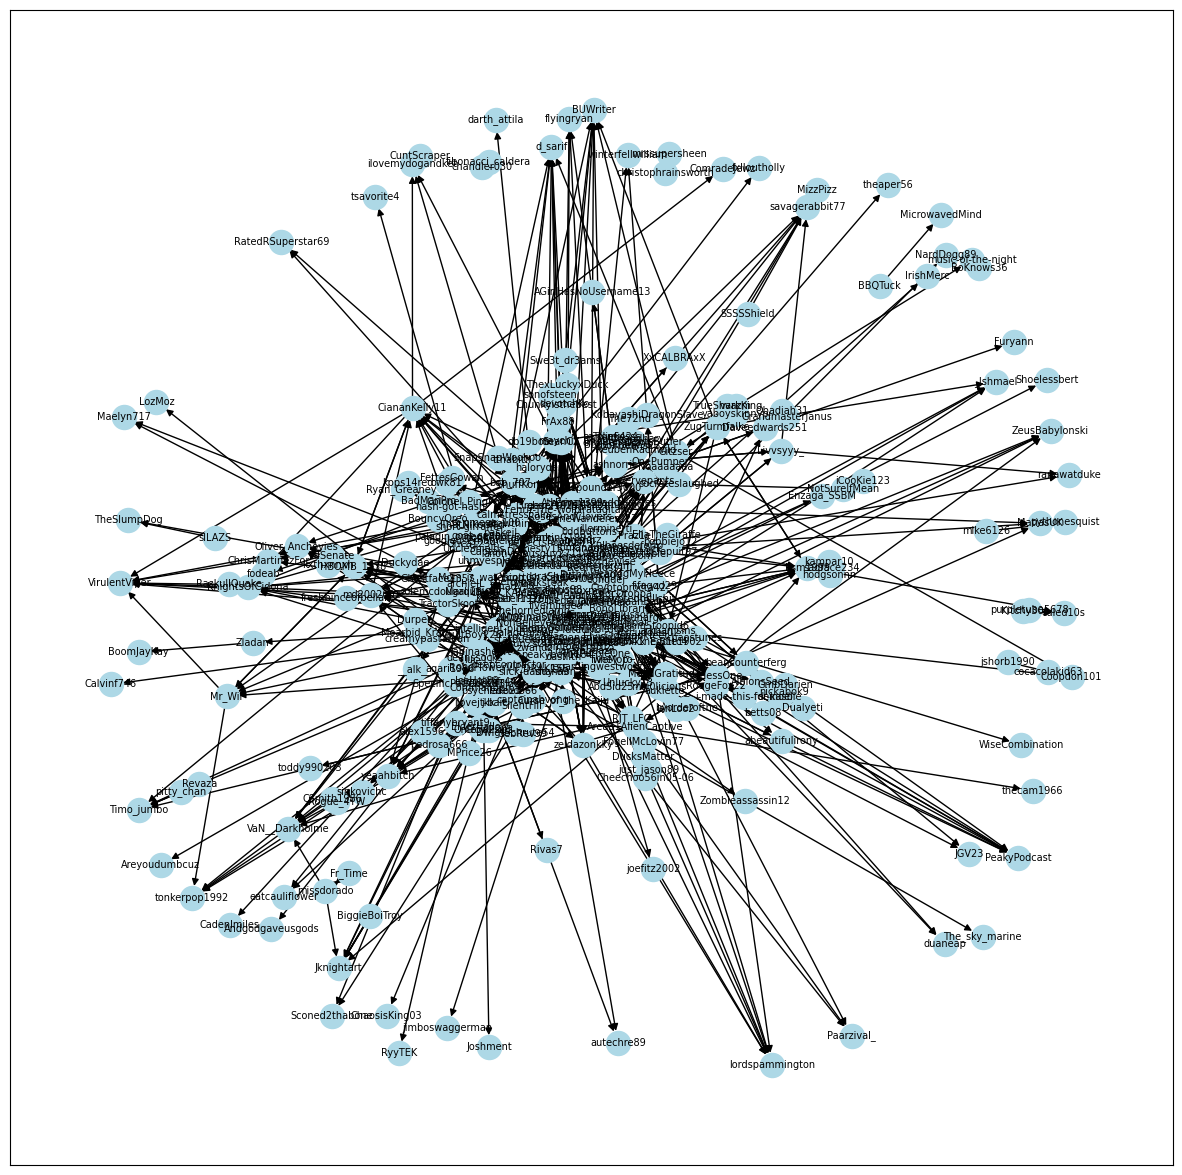

In [51]:
layout = nx.spring_layout(G2)

# Draw the subgraph with labels
plt.figure(figsize=(15, 15))  # Adjust figure size as needed
nx.draw_networkx(G2, pos=layout, with_labels=True, node_color='lightblue', node_size=300, font_size=7, arrows=True)

In [52]:
#create network for airing period
G3 = nx.DiGraph()
df3 = post_air.copy()
# Add edges to the graph (Parent ID -> Child ID)
for index, row in df3.iterrows():
    if row['Parent ID'] != row['Child ID']:
        G3.add_edge(row["Child ID"], row["Parent ID"])

nodes3 = G3.nodes()
metrics_df3 = pd.DataFrame(index=nodes3)
metrics_df3.reset_index(inplace=True)
metrics_df3.rename(columns={'index': 'Node'}, inplace=True)

# #get the betweeness of each node
betweenness_dict = nx.betweenness_centrality(G3)
metrics_df3['Betweenness'] = metrics_df3['Node'].map(betweenness_dict)

# #get the closeness of each node
closeness_dict = nx.closeness_centrality(G3)
metrics_df3['Closeness'] = metrics_df3['Node'].map(closeness_dict)

# #get the degree centrality of each node
degree_centrality_dict = nx.degree_centrality(G3)
metrics_df3['Degree Centrality'] = metrics_df3['Node'].map(degree_centrality_dict)

#get the degree of each node
degrees = dict(G3.degree())
for index,row in metrics_df3.iterrows():
    metrics_df3.at[index,'Degree'] = degrees[row['Node']]
metrics_df3.head()

,Node,Betweenness,Closeness,Degree Centrality,Degree
0,Omar_Elattar,0.082701,0.233110,0.192771,32.0
1,LilSenate,0.002192,0.209603,0.042169,7.0
2,0ddbuttons,0.012623,0.192608,0.066265,11.0
3,AlbionsSeed,0.206095,0.272599,0.415663,69.0
4,ZugTurmfalke,0.000000,0.000000,0.006024,1.0


In [53]:
#find number of submissions made by each user
submissions_count = df3[df3['Link Type'] == 'respond to a submission'].groupby('Parent ID')['post_parent_id'].nunique()
metrics_df3['#Submissions'] = metrics_df3['Node'].map(submissions_count).fillna(0)

#find number of comments made by each user
comments_count = df3['Child ID'].value_counts() 
metrics_df3['#Comments'] = metrics_df3['Node'].map(comments_count).fillna(0)

#find number of comments made on user's submissions
comments_on_submissions_count = df3[df3['Link Type'] == 'respond to a submission']['Parent ID'].value_counts()
metrics_df3['#Comments on Submissions'] = metrics_df3['Node'].map(comments_on_submissions_count).fillna(0)

#find number of comments made on user's comments
comments_on_comments_count = df3[df3['Link Type'] == 'respond to a comment']['Parent ID'].value_counts()
metrics_df3['#Comments on Comments'] = metrics_df3['Node'].map(comments_on_comments_count).fillna(0)


display(metrics_df3)

,Node,Betweenness,Closeness,Degree Centrality,Degree,#Submissions,#Comments,#Comments on Submissions,#Comments on Comments
0,Omar_Elattar,0.082701,0.233110,0.192771,32.0,0.0,46.0,0.0,40.0
1,LilSenate,0.002192,0.209603,0.042169,7.0,1.0,3.0,1.0,3.0
2,0ddbuttons,0.012623,0.192608,0.066265,11.0,0.0,8.0,0.0,3.0
3,AlbionsSeed,0.206095,0.272599,0.415663,69.0,7.0,103.0,7.0,67.0
4,ZugTurmfalke,0.000000,0.000000,0.006024,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
162,fIanintheface,0.000475,0.135559,0.012048,2.0,0.0,1.0,0.0,1.0
163,CitySwimmer_,0.000000,0.175037,0.012048,2.0,0.0,1.0,0.0,1.0
164,Disgujsed,0.000000,0.000000,0.006024,1.0,0.0,1.0,0.0,0.0
165,jono9898,0.000000,0.175037,0.012048,2.0,0.0,1.0,0.0,2.0


In [54]:
metrics_df3.isna().sum()

Node                        0
Betweenness                 0
Closeness                   0
Degree Centrality           0
Degree                      0
#Submissions                0
#Comments                   0
#Comments on Submissions    0
#Comments on Comments       0
dtype: int64

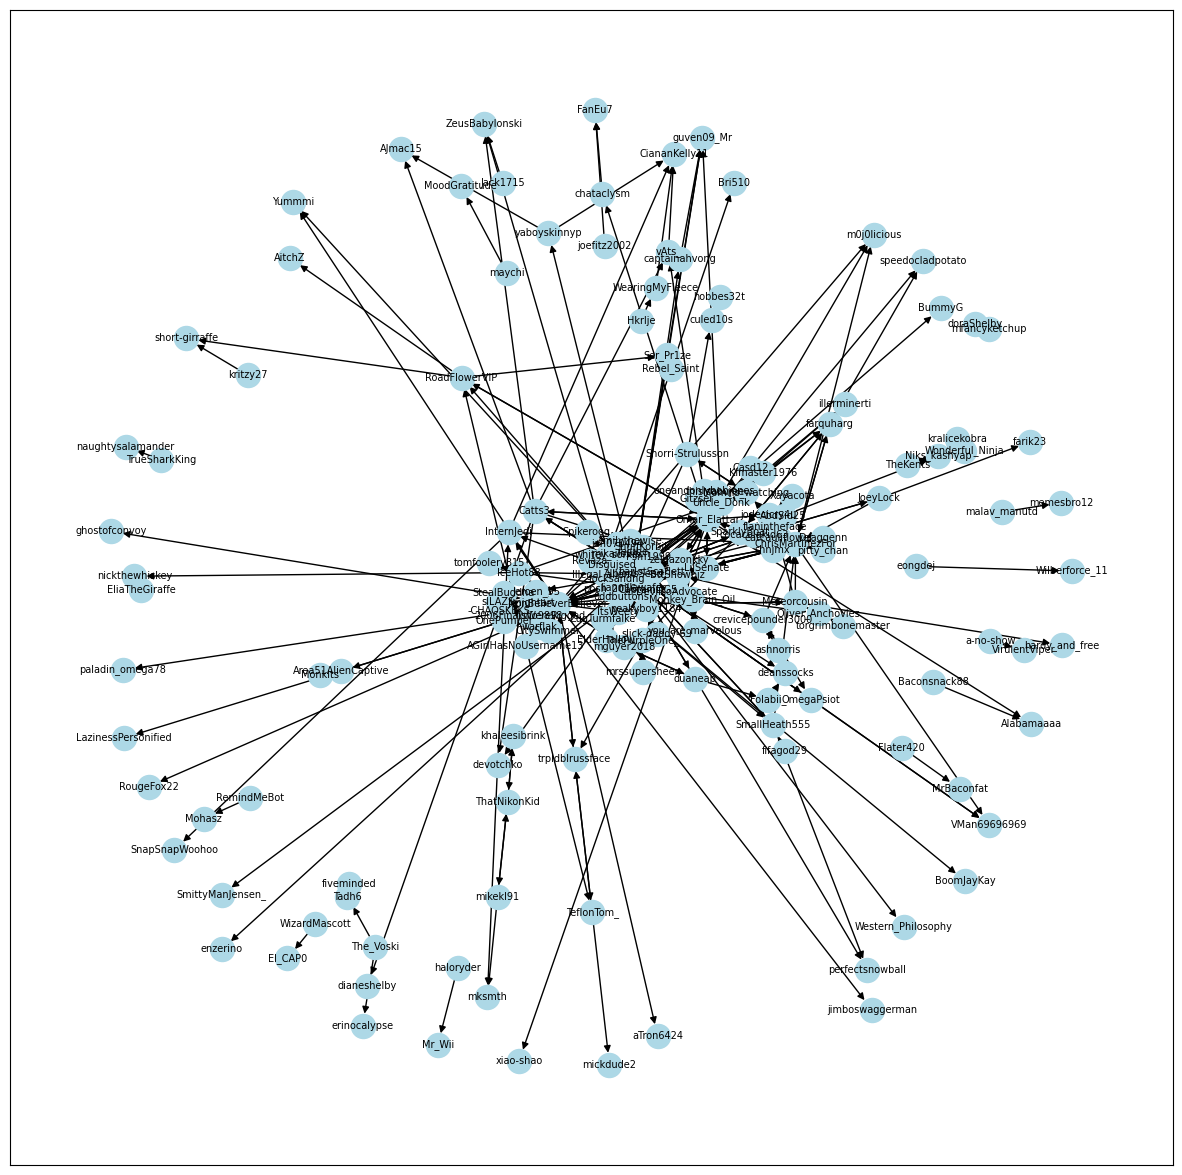

In [55]:
layout = nx.spring_layout(G3)

# Draw the subgraph with labels
plt.figure(figsize=(15, 15))  # Adjust figure size as needed
nx.draw_networkx(G3, pos=layout, with_labels=True, node_color='lightblue', node_size=300, font_size=7, arrows=True)

## Save Results for Team to Use

In [56]:
#node information for each period
metrics_df1.to_csv('node/pre_release_node_information.csv', index=False)
metrics_df2.to_csv('node/airing_node_information.csv', index=False)
metrics_df3.to_csv('node/post_airing_node_information.csv', index=False)

#comment information for each period
pre_release.to_csv('comments/pre_release_comments.csv', index=False)
airing.to_csv('comments/airing_comments.csv', index=False)
post_air.to_csv('comments/post_airing_comments.csv', index=False)

import pickle

with open('networks/pre_release_network.pkl', 'wb') as f:
    pickle.dump(G1, f)

with open('networks/airing_network.pkl', 'wb') as f:
    pickle.dump(G2, f)

with open('networks/post_airing_network.pkl', 'wb') as f:
    pickle.dump(G3, f)